<a href="https://colab.research.google.com/github/pachterlab/MBGBLHGP_2019/blob/master/notebooks/lost_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/pachterlab/MBGBLHGP_2019.git

Cloning into 'MBGBLHGP_2019'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 471 (delta 0), reused 67 (delta 0), pack-reused 402
Receiving objects: 100% (471/471), 477.13 MiB | 38.26 MiB/s, done.
Resolving deltas: 100% (148/148), done.
Checking out files: 100% (187/187), done.


In [2]:
!gunzip MBGBLHGP_2019/data/lost_counts/*/*

In [3]:
!date

Wed Jan 13 06:20:14 UTC 2021


# Limits of lost counts

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15

%config InlineBackend.figure_format = 'retina'

In [5]:
def lost(dg, n):
    return dg*(dg-1)/(2*n+1)

In [6]:
def lost(dg, n):
    return np.log(1-dg/n)/np.log(1-1/n) - dg

In [7]:
L = 10
n = 4**L
dg = np.linspace(0, 21000, 21000*4)

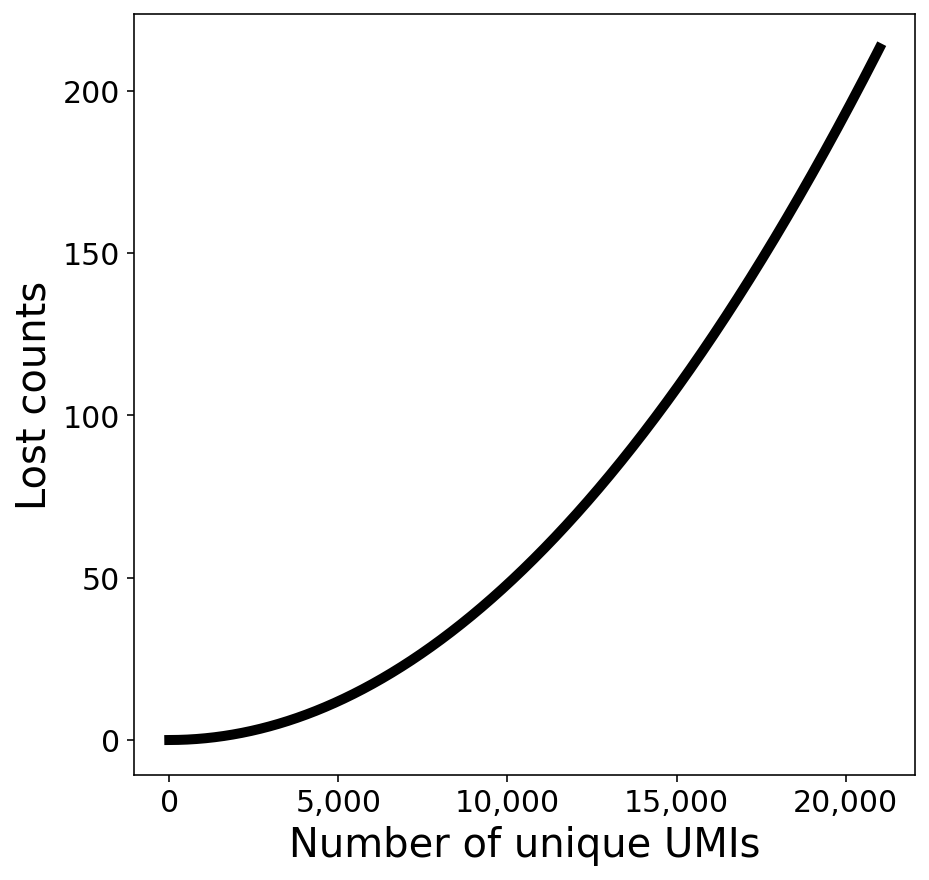

In [8]:
fig, ax = plt.subplots(figsize=(7,7))

ax.plot(dg, lost(dg, n), color="k", linewidth=5)

ax.set_xlabel("Number of unique UMIs", fontsize=20)
ax.set_ylabel("Lost counts", fontsize=20)
ax.get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

In [9]:
max_gene_files = glob.glob("/content/MBGBLHGP_2019/data/lost_counts/max_10_genes/*.txt")
n_est_files = glob.glob("/content/MBGBLHGP_2019/data/lost_counts/Nest/*.txt")

In [10]:
max_gene_files

['/content/MBGBLHGP_2019/data/lost_counts/max_10_genes/SRR8599150_v2.txt',
 '/content/MBGBLHGP_2019/data/lost_counts/max_10_genes/SRR6998058_v2.txt',
 '/content/MBGBLHGP_2019/data/lost_counts/max_10_genes/SRR8611943_v2.txt',
 '/content/MBGBLHGP_2019/data/lost_counts/max_10_genes/hgmm1k_v3.txt',
 '/content/MBGBLHGP_2019/data/lost_counts/max_10_genes/heart1k_v2.txt',
 '/content/MBGBLHGP_2019/data/lost_counts/max_10_genes/hgmm1k_v2.txt',
 '/content/MBGBLHGP_2019/data/lost_counts/max_10_genes/SRR8206317_v2.txt',
 '/content/MBGBLHGP_2019/data/lost_counts/max_10_genes/SRR8327928_v2.txt',
 '/content/MBGBLHGP_2019/data/lost_counts/max_10_genes/SRR8639063_v2.txt',
 '/content/MBGBLHGP_2019/data/lost_counts/max_10_genes/SRR6956073_v2.txt',
 '/content/MBGBLHGP_2019/data/lost_counts/max_10_genes/neuron10k_v3.txt',
 '/content/MBGBLHGP_2019/data/lost_counts/max_10_genes/SRR8513910_v2.txt',
 '/content/MBGBLHGP_2019/data/lost_counts/max_10_genes/pbmc10k_v3.txt',
 '/content/MBGBLHGP_2019/data/lost_count

# Get gene counts

In [11]:
u_2 = []
u_3 = []

for f in max_gene_files:
    with open(f, 'r') as file:
        tmp = []
        for line in file:
            data = int(line.split()[-1])
            tmp.append(data)
        tmp = np.array(tmp)
        if 'v2' in f:
            u_2.append(tmp.mean())
        else:
            u_3.append(tmp.mean())


# Get n est

In [12]:
n_2 = []
n_3 = []

for f in n_est_files:
    with open(f, 'r') as file:
        data = file.read().split(",")
        data = np.array(list(map(int, data)))[:10]
        if "v3" in f:
            n_3.append(data.mean())
        else:
            n_2.append(data.mean())

# V2

share y axis with fraction counts

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


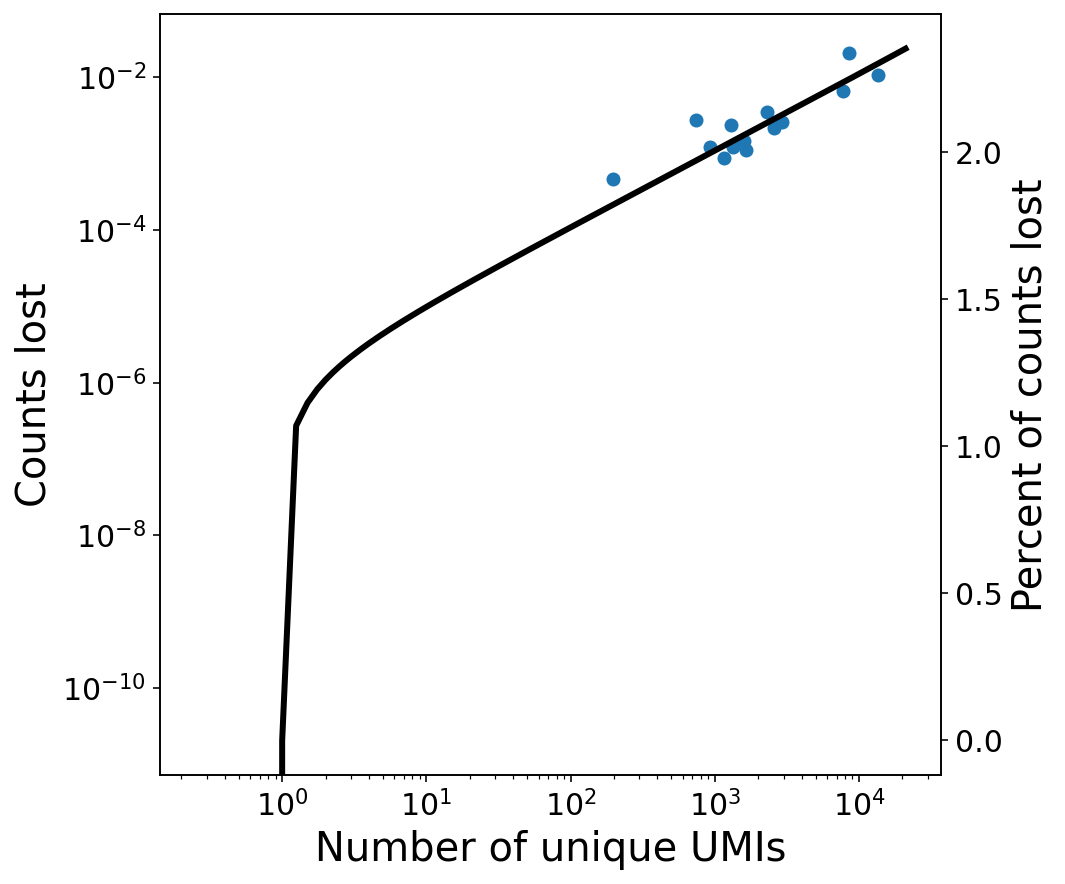

In [13]:
fig, ax = plt.subplots(figsize=(7,7))

y_theory = lost(dg, np.mean(n_2))
y_exp =  lost(np.array(u_2), np.array(n_2))

ax.plot(dg, y_theory/dg, color="k", linewidth=3)
ax.scatter(u_2, y_exp/u_2)

ax.set_xlabel("Number of unique UMIs", fontsize=20)
ax.set_ylabel("Counts lost", fontsize=20)
ax.get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax2 = ax.twinx()

ax2.plot(dg, y_theory/dg*100, color="k", linewidth=0)
ax2.set_ylabel("Percent of counts lost", fontsize=20)


#ax.set_ylim(0,1)
ax.set_yscale('log')
ax.set_xscale('log')
#ax2.set_yscale('log')

plt.show()

# V3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


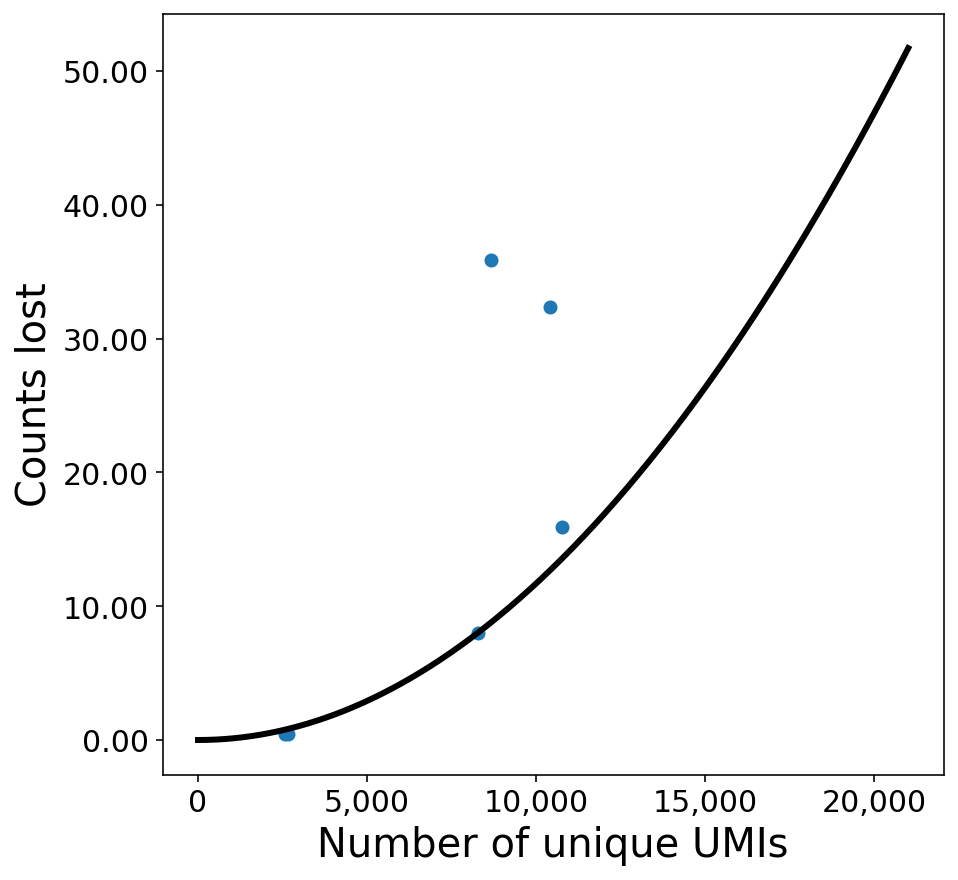

In [14]:
fig, ax = plt.subplots(figsize=(7,7))

y_theory = lost(dg, np.mean(n_3))
y_exp =  lost(np.array(u_3), np.array(n_3))

ax.plot(dg, y_theory, color="k", linewidth=3)
ax.scatter(u_3, y_exp)

ax.set_xlabel("Number of unique UMIs", fontsize=20)
ax.set_ylabel("Counts lost", fontsize=20)


ax2 = ax.twinx()

ax2.plot(dg, y_theory/dg*100, color="k", linewidth=0)
ax2.set_ylabel("Percent of counts lost", fontsize=20)

labels = [item.get_text() for item in ax2.get_yticklabels()]
ax.set_yticklabels(ax2.get_yticks().tolist())
ax.get_yaxis().set_major_formatter(
    mpl.ticker.StrMethodFormatter('{x:,.2f}'))

ax2.remove()

ax.get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


plt.show()

# Fixing plot v2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


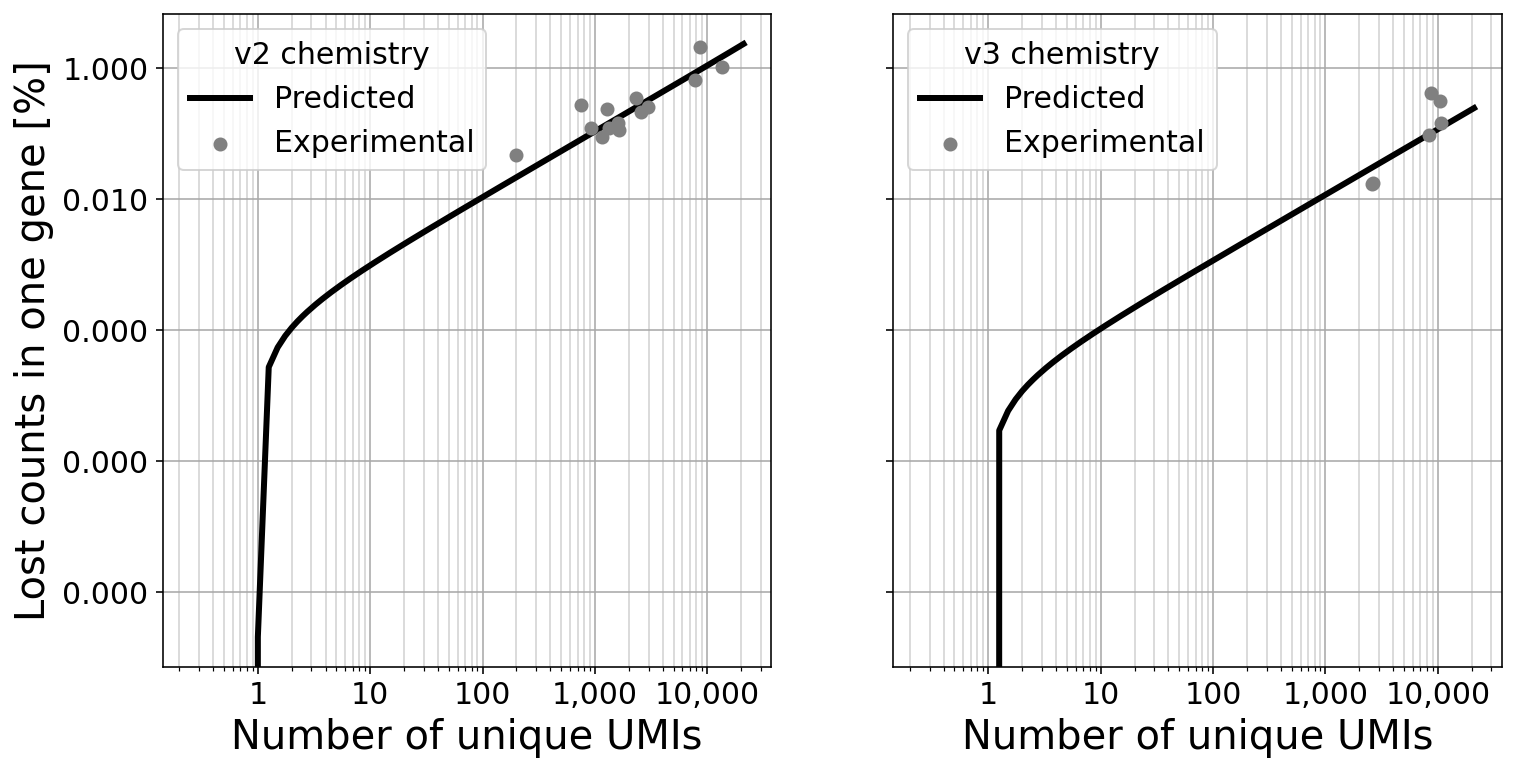

In [15]:
fig, ax = plt.subplots(figsize=(12, 6),ncols=2, sharey=True)

y_theory = lost(dg, np.mean(n_2))
y_exp =  lost(np.array(u_2), np.array(n_2))

# v2
ax[0].grid(b=True, which='minor', color='lightgrey')
ax[0].grid(b=True, which='major', color='darkgrey')
ax[0].plot(dg, y_theory/dg*100, color="k", linewidth=3, label="Predicted")
ax[0].scatter(u_2, y_exp/u_2*100, color='grey', label="Experimental", zorder=10)
ax[0].set_xlabel("Number of unique UMIs", fontsize=20)
ax[0].set_ylabel("Lost counts in one gene [%]", fontsize=20)
ax[0].get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].get_yaxis().set_major_formatter(
    mpl.ticker.StrMethodFormatter('{x:,.2f}'))
ax[0].get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


ax[0].set_aspect('auto')
ax[0].legend(title="v2 chemistry", fontsize=15, title_fontsize=15)


# v3
y_theory = lost(dg, np.mean(n_3))
y_exp =  lost(np.array(u_3), np.array(n_3))
ax[1].grid(b=True, which='minor', color='lightgrey')
ax[1].grid(b=True, which='major', color='darkgrey')

ax[1].plot(dg, y_theory/dg*100, color="k", linewidth=3, label="Predicted")
ax[1].scatter(u_3, y_exp/u_3*100, color='grey', label="Experimental", zorder=10)
ax[1].set_xlabel("Number of unique UMIs", fontsize=20)
#ax[1].set_ylabel("Percentage of counts lost", fontsize=20)
ax[1].set_yscale("log")
ax[1].set_xscale("log")
ax[1].get_yaxis().set_major_formatter(
    mpl.ticker.StrMethodFormatter('{x:,.3f}'))
ax[1].get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[1].set_aspect('auto')
ax[1].legend(title="v3 chemistry", fontsize=15, title_fontsize=15)


plt.savefig('lost_counts_exp_v_theory.png', dpi=300, bbox_inches='tight')

plt.show()

# Including a reference

In [16]:
max_cell = glob.glob("/content/MBGBLHGP_2019/data/lost_counts/max_cell/*.pkl")

In [17]:
max_cell

['/content/MBGBLHGP_2019/data/lost_counts/max_cell/SRR8639063_v2.pkl',
 '/content/MBGBLHGP_2019/data/lost_counts/max_cell/hgmm1k_v3.pkl',
 '/content/MBGBLHGP_2019/data/lost_counts/max_cell/hgmm1k_v2.pkl',
 '/content/MBGBLHGP_2019/data/lost_counts/max_cell/SRR8611943_v2.pkl',
 '/content/MBGBLHGP_2019/data/lost_counts/max_cell/SRR8599150_v2.pkl',
 '/content/MBGBLHGP_2019/data/lost_counts/max_cell/SRR6998058_v2.pkl',
 '/content/MBGBLHGP_2019/data/lost_counts/max_cell/neuron10k_v3.pkl',
 '/content/MBGBLHGP_2019/data/lost_counts/max_cell/SRR8206317_v2.pkl',
 '/content/MBGBLHGP_2019/data/lost_counts/max_cell/pbmc10k_v3.pkl',
 '/content/MBGBLHGP_2019/data/lost_counts/max_cell/SRR8327928_v2.pkl',
 '/content/MBGBLHGP_2019/data/lost_counts/max_cell/EMTAB7320_v2.pkl',
 '/content/MBGBLHGP_2019/data/lost_counts/max_cell/heart1k_v3.pkl',
 '/content/MBGBLHGP_2019/data/lost_counts/max_cell/heart1k_v2.pkl',
 '/content/MBGBLHGP_2019/data/lost_counts/max_cell/pbmc1k_v3.pkl',
 '/content/MBGBLHGP_2019/data

In [18]:
import pickle

In [19]:
with open(max_cell[0], "rb") as file:
    s = pickle.load(file)

In [20]:
s.shape

(7433, 3)

In [21]:
s[2].mean()

14.00713036459034

In [22]:
mean_v2 = []
mean_v3 = []

In [23]:
for f in max_cell:
    with open(f, "rb") as file:
        s = pickle.load(file)
        if "v2" in f:
            mean_v2.append(s[2].mean())
        else:
            mean_v3.append(s[2].mean())
            
mean_v2 = np.array(mean_v2)
mean_v3 = np.array(mean_v3)

In [24]:
mean_v2

array([14.00713036,  9.93796783,  8.79500571,  2.19902235,  6.83488837,
        7.56252427,  4.95250613,  9.93187606,  6.287768  ,  6.46119379,
       15.04527596,  6.78234212, 42.44926852, 11.13325766])

In [25]:
mean_v3

array([11.44572632,  7.92877416,  9.99277346, 12.21847796,  9.11485921,
       12.03102837])

# Plotting with reference

v2:  0.41221820903206047
v3:  0.16760809920341688


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


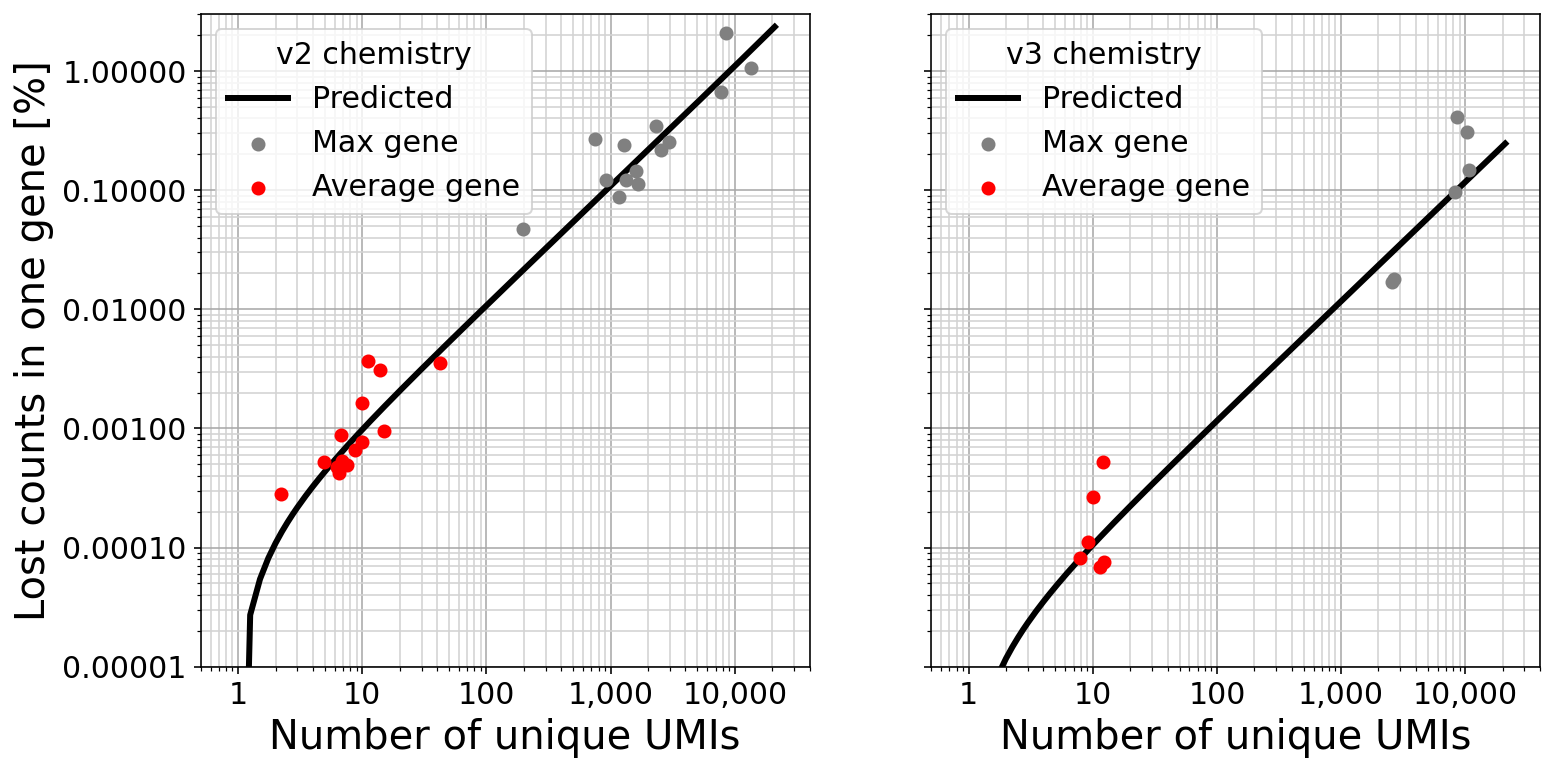

In [26]:
fig, ax = plt.subplots(figsize=(12, 6),ncols=2, sharey=True)

y_theory = lost(dg, np.mean(n_2))
y_exp =  lost(np.array(u_2), np.array(n_2))

print("v2: ", (y_exp/u_2*100).mean())

# v2
ax[0].grid(b=True, which='minor', color='lightgrey')
ax[0].grid(b=True, which='major', color='darkgrey')
ax[0].plot(dg, y_theory/dg*100, color="k", linewidth=3, label="Predicted")
ax[0].scatter(u_2, y_exp/u_2*100, color='grey', label="Max gene", zorder=10)


avg = lost(mean_v2, np.array(n_2))
ax[0].scatter(mean_v2, avg/mean_v2*100, color='red', label="Average gene", zorder=10)


ax[0].set_xlabel("Number of unique UMIs", fontsize=20)
ax[0].set_ylabel("Lost counts in one gene [%]", fontsize=20)
ax[0].get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].get_yaxis().set_major_formatter(
    mpl.ticker.StrMethodFormatter('{x:,.2f}'))
ax[0].get_xaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


ax[0].set_aspect('auto')
ax[0].legend(title="v2 chemistry", fontsize=15, title_fontsize=15)


# v3
y_theory = lost(dg, np.mean(n_3))
y_exp =  lost(np.array(u_3), np.array(n_3))

print("v3: ", (y_exp/u_3*100).mean())


ax[1].grid(b=True, which='minor', color='lightgrey')
ax[1].grid(b=True, which='major', color='darkgrey')

ax[1].plot(dg, y_theory/dg*100, color="k", linewidth=3, label="Predicted")
ax[1].scatter(u_3, y_exp/u_3*100, color='grey', label="Max gene", zorder=10)


avg = lost(mean_v3, np.array(n_3))

ax[1].scatter(mean_v3, avg/mean_v3*100, color='red', label="Average gene", zorder=10)


ax[1].set_xlabel("Number of unique UMIs", fontsize=20)
#ax[1].set_ylabel("Percentage of counts lost", fontsize=20)
ax[1].set_yscale("log")
ax[1].set_xscale("log")
ax[1].get_yaxis().set_major_formatter(
    mpl.ticker.StrMethodFormatter('{x:,.5f}'))
ax[1].get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#ax[1].get_xaxis().set_major_formatter(
#    mpl.ticker.StrMethodFormatter('{x:,.2f}'))
ax[1].set_aspect('auto')
ax[1].legend(title="v3 chemistry", fontsize=15, title_fontsize=15)


## setting axis lims
ax[0].set_ylim((0.00001, 3))
ax[1].set_ylim((0.00001, 3))

ax[0].set_xlim((0.5, 40000))
ax[1].set_xlim((0.5, 40000))
plt.savefig('lost_counts_exp_v_theory.png', dpi=300, bbox_inches='tight')

plt.show()